In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import progressbar
import plotly.graph_objs as go
import numpy as np
import plotly as py
import cufflinks
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [7]:
business=pd.read_json('yelp_academic_dataset_business.json',lines=True)

In [8]:
business=business.dropna(subset=['categories'])
restaurant=business[business['categories'].str.contains('Restaurants')]

In [61]:
labels=['ON','AZ','NV','QC','OH','NC','PA','AB','WI']
good=restaurant[restaurant['stars']>=4]['state'].value_counts()
size1=[]
for i in range(len(good)):
    p=good.iloc[i]/sum(good.values)
    if p>0.01:
        size1.append(p*100)
#explode=(0.1,0.1,0,0,0,0,0,0,0)

In [62]:
bad=restaurant[restaurant['stars']<=2]['state'].value_counts()
size2=[]
for i in range(len(bad)):
    p=bad.iloc[i]/sum(bad.values)
    if p>0.01:
        size2.append(p*100)
size2.pop()

1.486417221937468

In [66]:
medium=restaurant[restaurant['stars']==3]['state'].value_counts()
size3=[]
for i in range(len(medium)):
    p=medium.iloc[i]/sum(medium.values)
    if p>0.01:
        size3.append(p*100)
size3.pop()

1.3435194942044257

In [73]:
fig = go.Figure(data=[go.Bar(name='good',x=labels, y=size1),go.Bar(name='medium',x=labels,y=size3),go.Bar(name='bad',x=labels,y=size2)])
fig.update_layout(barmode='group',title='top9 restaurant with different star rate')
fig

In [76]:
fig = go.Figure(data=[go.Pie(labels=labels, values=size1,textinfo='label+percent')])
fig.update_layout(title='top 9 good restaurants: star>=4')
fig

In [77]:
fig = go.Figure(data=[go.Pie(labels=labels, values=size3,textinfo='label+percent')])
fig.update_layout(title='top 9 good restaurants: star=3')
fig

In [78]:
fig = go.Figure(data=[go.Pie(labels=labels, values=size2,textinfo='label+percent')])
fig.update_layout(title='top 9 good restaurants: star<=2')
fig

In [16]:
review=pd.read_json('Yelp_dataset_review_clean.json')

In [17]:
review['user_id'].unique()

array(['4PFwh5zbgyPhTGRtxkSZZA', 'dvwFC5u09dbG_16AeNKBmQ',
       'Z6-ZsBP3DqfQNt2Xju6epA', ..., 'KEUHEu0zR6kEH89P_Wlbhw',
       'zv51SeKf36N2jU84UFPCkw', 'pjj4Y76C7jHNpH4WOG6slQ'], dtype=object)

In [18]:
rest_5=restaurant[restaurant['stars']==4]

business_id                         name  \
33      vjTVxnsQEZ34XjYNS-XUpA            Wetzel's Pretzels   
44      Ga2Bt7xfqoggTypWD5VpoQ                Amando's Bros   
61      -qjn24n8HYF6It9GQrQntw  Five Guys Burgers and Fries   
63      ZkzutF0P_u0C0yTulwaHkA             Lelulos Pizzeria   
73      0QjROMVW9ACKjhSEfHqNCQ             Mi Mi Restaurant   
...                        ...                          ...   
209344  kPwYdRKp1-W1-tUR8iylxw             Aladdin's Eatery   
209359  GAgEoHcf4PSuZRS5Zd3ltA                 Q's Shawarma   
209376  cmsAFAymfVoBitSF8R6GKw     Yao Fine Chinese Cuisine   
209381  xVpE01l6ZXdEtVf5PkRpDg                        Julep   
209388  9Q0fPWAjUweoFDk0kafuzQ                  Nishi Sushi   

                             address           city state postal_code  \
33      4550 East Cactus Rd, #KSFC-4        Phoenix    AZ       85032   
44               2602 W Southern Ave          Tempe    AZ       85282   
61                  2130 E Arbors Dr      Charlotte    NC       28262   
63               311 Unity Center Rd           Plum    PA       15239   
73              688 Gerrard Street E        Toronto    ON     M4M 1Y3   
...                              ...            ...   ...         ...   
209344              4885 McKnight Rd  Ross Township    PA       15237   
209359        1075 Martin Grove Road        Toronto    ON     M9W 4W6   
209376    2487 S Gilbert Rd, Ste 102        Gilbert    AZ       85295   
209381          829 E Washington Ave        Madison    WI       53703   
209388              9750 Weston Road        Vaughan    ON     L4H 2P2   

         latitude   longitude  stars  review_count  is_open  \
33      33.602822 -111.983533    4.0            10        1   
44      33.393199 -111.976270    4.0             9        0   
61      35.338070  -80.757397    4.0            15        0   
63      40.489996  -79.779288    4.0            31        1   
73      43.666376  -79.348773    4.0           116        1   
...           ...         ...    ...           ...      ...   
209344  40.530338  -80.010495    4.0            94        1   
209359  43.701807  -79.575135    4.0            16        1   
209376  33.304935 -111.788861    4.0           230        1   
209381  43.081022  -89.374006    4.0            95        0   
209388  43.838555  -79.559823    4.0             5        0   

                                               attributes  \
33      {'GoodForKids': 'True', 'RestaurantsTakeOut': ...   
44      {'Caters': 'False', 'RestaurantsGoodForGroups'...   
61      {'RestaurantsReservations': 'False', 'Restaura...   
63      {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
73      {'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...   
...                                                   ...   
209344  {'HasTV': 'False', 'RestaurantsPriceRange2': '...   
209359  {'GoodForKids': 'True', 'HasTV': 'True', 'Rest...   
209376  {'RestaurantsGoodForGroups': 'True', 'Ambience...   
209381  {'NoiseLevel': 'u'average'', 'BikeParking': 'T...   
209388  {'Ambience': '{'romantic': False, 'intimate': ...   

                                               categories  \
33       Food, Pretzels, Bakeries, Fast Food, Restaurants   
44                                   Mexican, Restaurants   
61        Fast Food, American (New), Restaurants, Burgers   
63                                     Restaurants, Pizza   
73                                Vietnamese, Restaurants   
...                                                   ...   
209344  Juice Bars & Smoothies, Mediterranean, Restaur...   
209359                         Restaurants, Mediterranean   
209376                               Chinese, Restaurants   
209381     Nightlife, Diners, Bars, Southern, Restaurants   
209388                  Japanese, Sushi Bars, Restaurants   

                                                    hours  
33      {'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...  
44      {'Monday': '7:0-20:0', 'Tuesday': 

In [19]:
a=list(set(rest_5['business_id']))

'AlaQkBtE8iXEP7qwrR5_Gw'

In [20]:
b=list(review[review['business_id']==a[10]]['text'])

In [31]:
star=[1, 2, 3, 4, 5]
fig=go.Figure()
for i in range(len(star)):    
    rest_5=restaurant[restaurant['stars']==star[i]]
    a=list(set(rest_5['business_id']))
    hh=[]
    for j in progressbar.progressbar(range(len(a))):
        b=list(review[review['business_id']==a[j]]['text'])
        polarity=[]
        for sentence in b:
            blob = TextBlob(sentence)
            polarity.append(blob.sentiment.polarity)
        if len(polarity)!=0:
            hh.append(sum(polarity)/len(polarity))
        if j==500:
            break
    #plt.plot(hh,label='star{}'.format(str(star[i])))
    trace=go.Scatter(x=np.linspace(0,len(hh),num=len(hh)),y=hh,line_shape='spline',name='star{}'.format(str(star[i])))
    fig.add_trace(trace)
    fig.update_layout(title="polarity of different star rate",xaxis_title='review number',yaxis_title='Polarity')
fig

100% (460 of 460) |######################| Elapsed Time: 0:01:11 Time:  0:01:11
 29% (500 of 1670) |######               | Elapsed Time: 0:01:24 ETA:   0:03:22

In [35]:
star=[1, 2, 3, 4, 5]
fig=go.Figure()
for i in range(len(star)):    
    rest_5=restaurant[restaurant['stars']==star[i]]
    a=list(set(rest_5['business_id']))
    hhh=[]
    for j in progressbar.progressbar(range(len(a))):
        b=list(review[review['business_id']==a[j]]['text'])
        subjectivity=[]
        for sentence in b:
            blob = TextBlob(sentence)
            subjectivity.append(blob.sentiment.subjectivity)
            #print(subjectivity)
        if len(subjectivity)!=0:
            hhh.append(sum(subjectivity)/len(subjectivity))
        if j==500:
            break
    trace=go.Scatter(x=np.linspace(0,len(hhh),num=len(hhh)),y=hhh,line_shape='spline',name='star{}'.format(str(star[i])))
    fig.add_trace(trace)
    fig.update_layout(title="subjectivity of different star rate",xaxis_title='review number',yaxis_title='subjectivity')
fig

100% (460 of 460) |######################| Elapsed Time: 0:01:11 Time:  0:01:11
 29% (500 of 1670) |######               | Elapsed Time: 0:01:22 ETA:   0:03:19

  3% (15 of 460) |                       | Elapsed Time: 0:00:04 ETA:   0:02:00

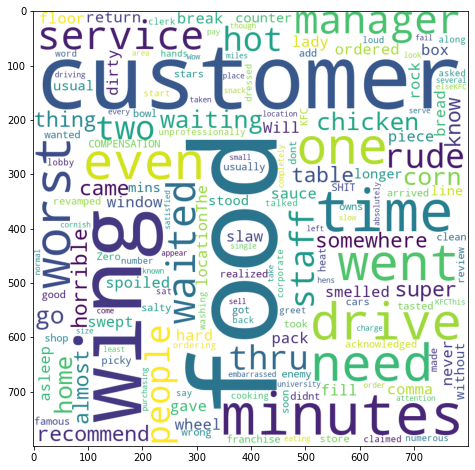

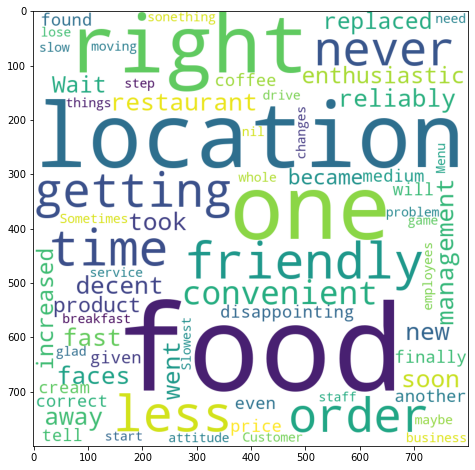

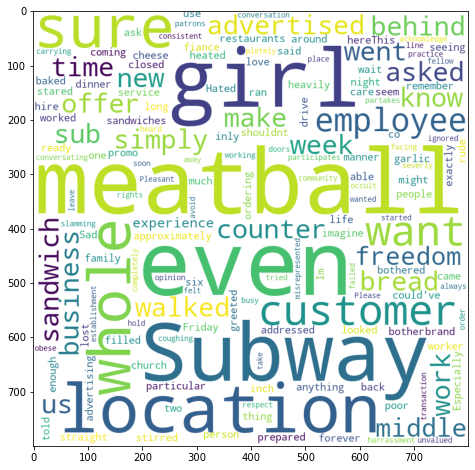

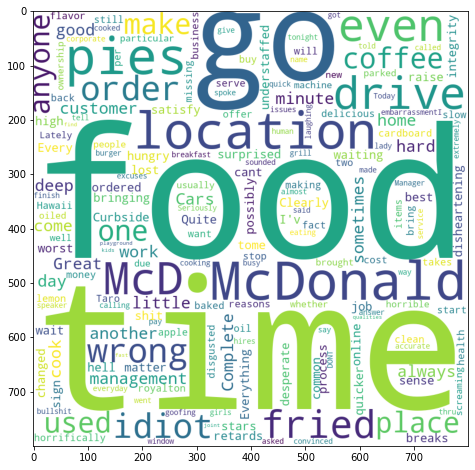

In [51]:
stopwords = set(STOPWORDS) 
rest_5=restaurant[restaurant['stars']==star[0]]
a=list(set(rest_5['business_id']))
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    #print(bs)
    try:
        wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords, 
              min_font_size = 10).generate(bs) 
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
    except:
        pass
    if i==15:
        break

  0% (15 of 3848) |                      | Elapsed Time: 0:00:10 ETA:   0:45:23

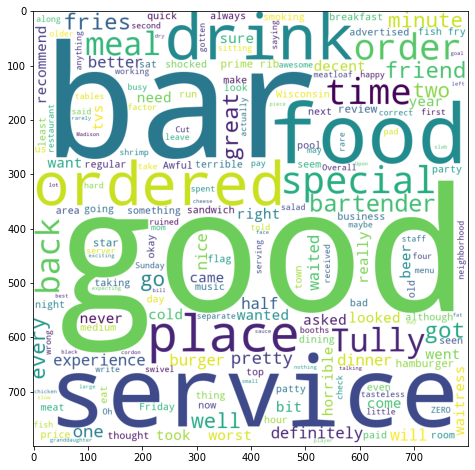

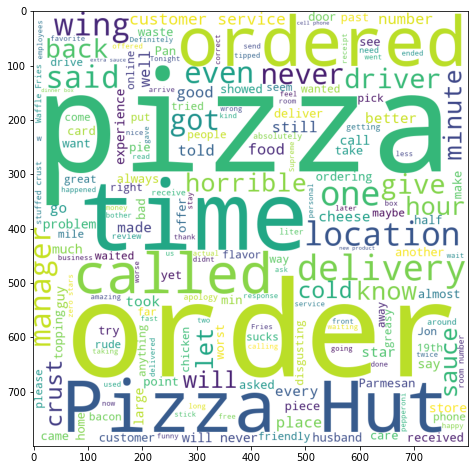

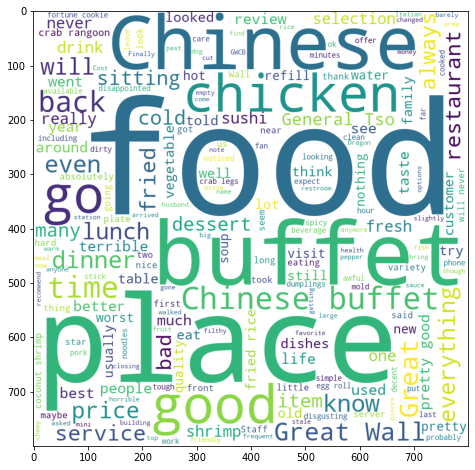

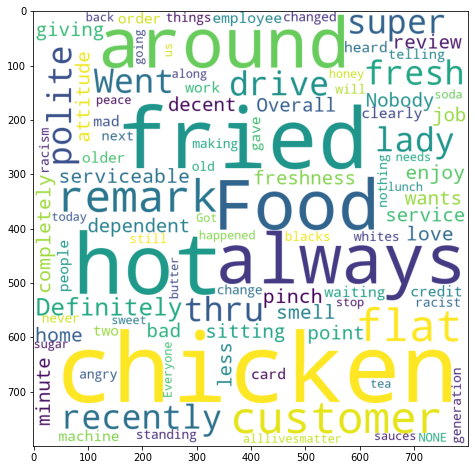

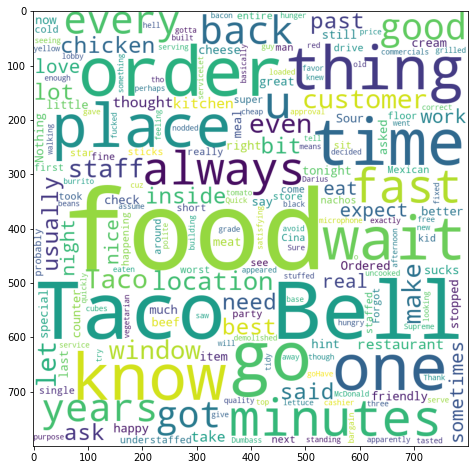

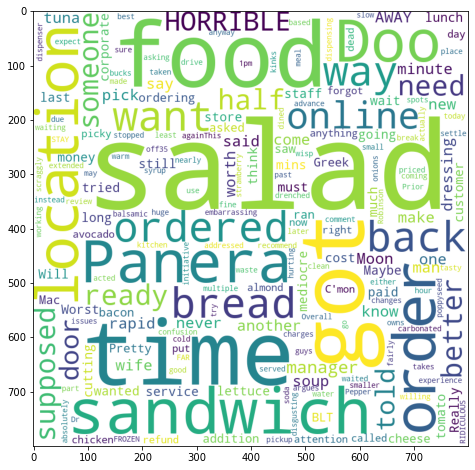

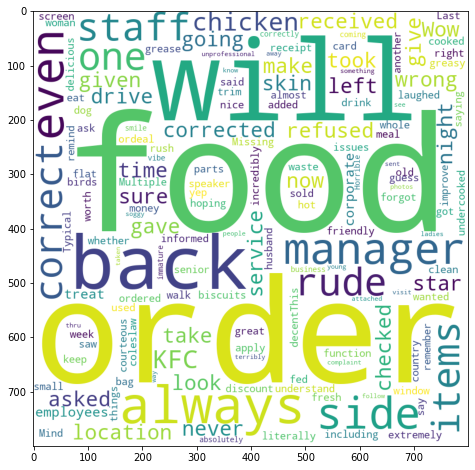

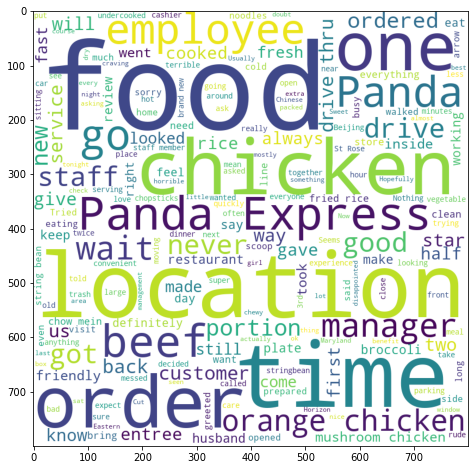

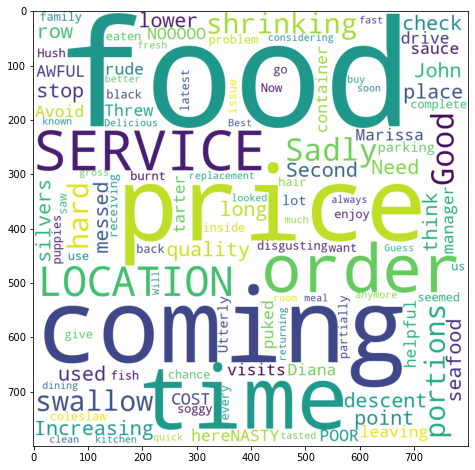

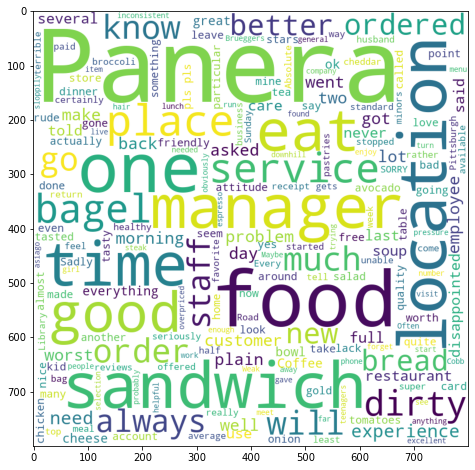

In [79]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[1]]
a=list(set(rest_5['business_id']))
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    #print(bs)
    try:
        wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords, 
              min_font_size = 10).generate(bs) 
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
    except:
        pass
    if i==15:
        break

  0% (15 of 11388) |                     | Elapsed Time: 0:00:04 ETA:   1:04:56

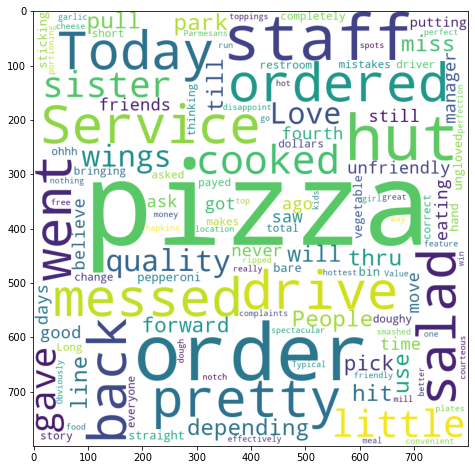

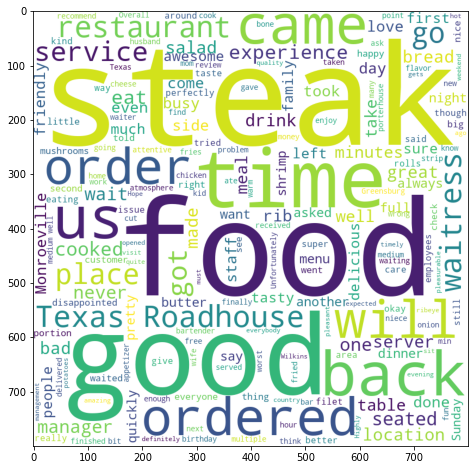

In [80]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[2]]
a=list(set(rest_5['business_id']))
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    #print(bs)
    try:
        wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords, 
              min_font_size = 10).generate(bs) 
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
    except:
        pass
    if i==15:
        break

  0% (15 of 15495) |                     | Elapsed Time: 0:00:08 ETA:   3:27:49

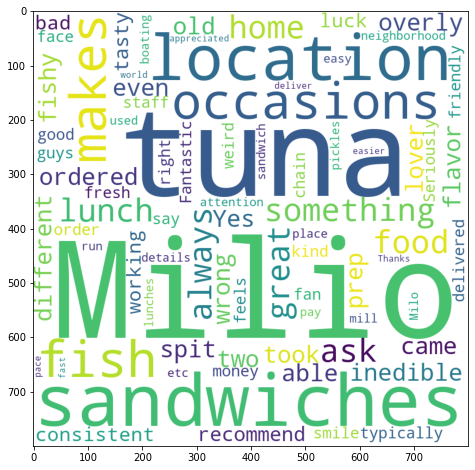

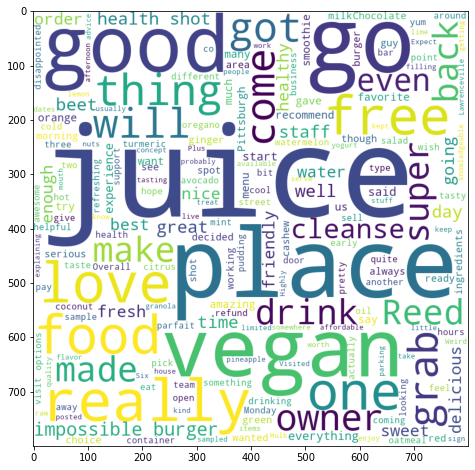

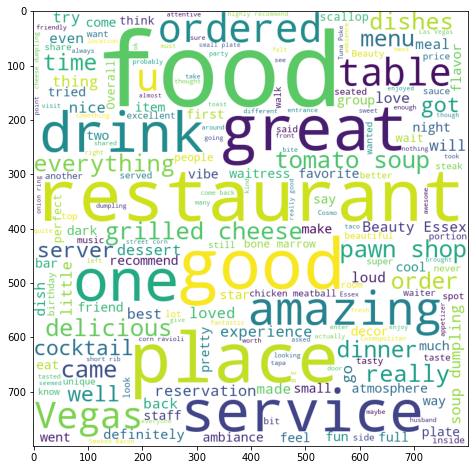

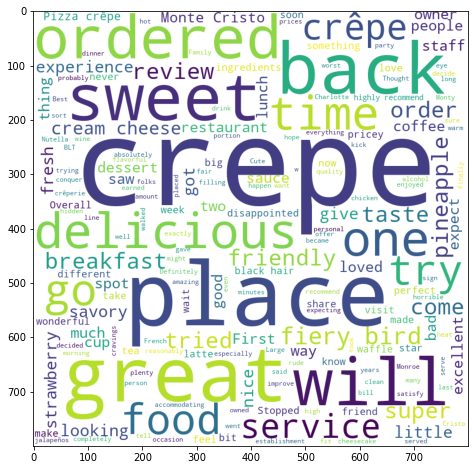

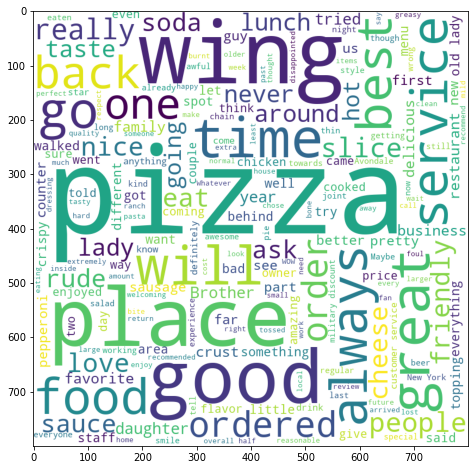

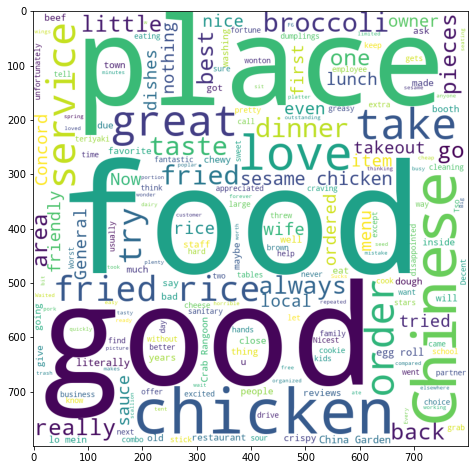

In [81]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[3]]
a=list(set(rest_5['business_id']))
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    #print(bs)
    try:
        wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords, 
              min_font_size = 10).generate(bs) 
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
    except:
        pass
    if i==15:
        break

  0% (15 of 1670) |                      | Elapsed Time: 0:00:05 ETA:   0:10:43

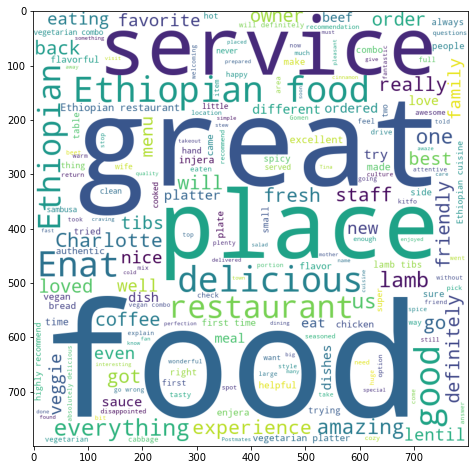

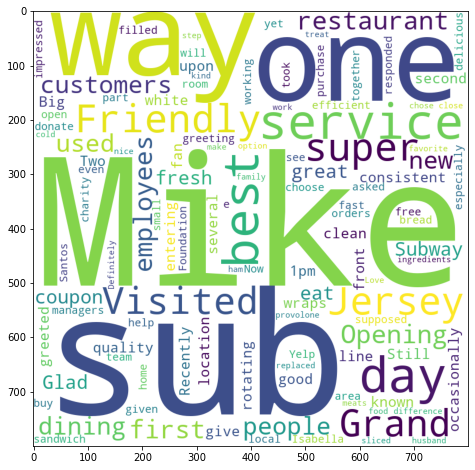

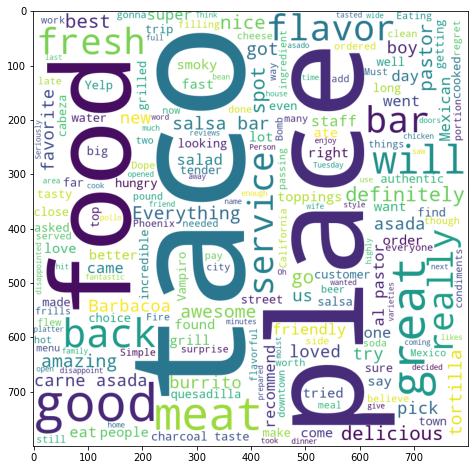

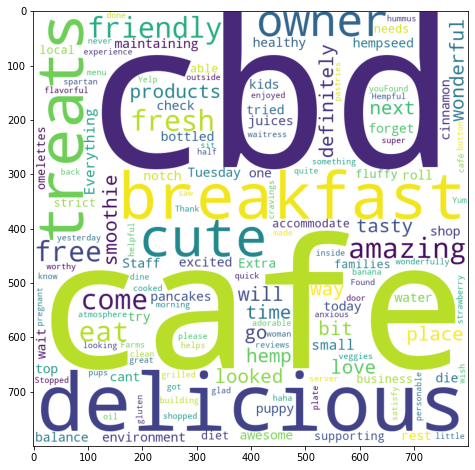

In [82]:
stopwords = set(STOPWORDS) 
stopwords
rest_5=restaurant[restaurant['stars']==star[4]]
a=list(set(rest_5['business_id']))
for i in progressbar.progressbar(range(len(a))):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    for s in b:
        bs+=s
    #print(bs)
    try:
        wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
               stopwords = stopwords, 
              min_font_size = 10).generate(bs) 
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
    except:
        pass
    if i==15:
        break